#  <font color='red'>ADA Predictive Analysis</font> 





 

In [1]:
pip list

Package                            Version
---------------------------------- -------------------
-                                  ikit-learn
-cikit-learn                       0.23.2
-ltk                               3.5
absl-py                            0.12.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-si

# Importing Libraries

In [10]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import datetime
from matplotlib.pylab import gca, figure, plot, subplot, title, xlabel, ylabel, xlim,show
from matplotlib.lines import Line2D
import tensorflow
import segment
import fit
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [11]:
# Apple Dataset for 2018, 2019 and 2020
#dataset1=  pd.read_csv('Binance_ADAUSDT_1h.csv') # Hourly
dataset2=  pd.read_csv('Binance_ADAUSDT_d.csv') # Daily
#dataset3=  pd.read_csv('Binance_ADAUSDT_minute.csv') #Minutes
dataset2.head()

,unix,date,symbol,open,high,low,close,Volume ADA,Volume USDT,tradecount
0,1.622070e+12,5/27/2021 0:00,ADA/USDT,1.7788,1.7790,1.7607,1.7710,3.240370e+06,5.732675e+06,6206
1,1.621990e+12,5/26/2021 0:00,ADA/USDT,1.5525,1.8320,1.5520,1.7791,8.570805e+08,1.472383e+09,2010480
2,1.621900e+12,5/25/2021 0:00,ADA/USDT,1.5497,1.6499,1.4354,1.5532,8.077173e+08,1.239076e+09,1776216
3,1.621810e+12,5/24/2021 0:00,ADA/USDT,1.3135,1.5974,1.2476,1.5500,1.034256e+09,1.503761e+09,2078079
4,1.621730e+12,5/23/2021 0:00,ADA/USDT,1.4636,1.5397,1.0510,1.3139,1.461270e+09,1.839006e+09,2445334


In [12]:
import datetime

dataset2['date']= pd.to_datetime(dataset2['date'])

dataset2 = dataset2.sort_values('date')
dataset2

,unix,date,symbol,open,high,low,close,Volume ADA,Volume USDT,tradecount
1136,1.523920e+12,2018-04-17,ADA/USDT,0.25551,0.28800,0.23983,0.24260,6.746229e+07,1.741182e+07,42568
1135,1.524010e+12,2018-04-18,ADA/USDT,0.24260,0.26460,0.24201,0.26200,3.132810e+07,7.922134e+06,21684
1134,1.524100e+12,2018-04-19,ADA/USDT,0.26199,0.27500,0.25777,0.27004,5.085998e+07,1.360991e+07,32600
1133,1.524180e+12,2018-04-20,ADA/USDT,0.27004,0.30442,0.26648,0.30108,7.108428e+07,2.027089e+07,46506
1132,1.524270e+12,2018-04-21,ADA/USDT,0.30161,0.30700,0.26509,0.28668,9.271984e+07,2.653939e+07,55256
...,...,...,...,...,...,...,...,...,...,...
4,1.621730e+12,2021-05-23,ADA/USDT,1.46360,1.53970,1.05100,1.31390,1.461270e+09,1.839006e+09,2445334
3,1.621810e+12,2021-05-24,ADA/USDT,1.31350,1.59740,1.24760,1.55000,1.034256e+09,1.503761e+09,2078079
2,1.621900e+12,2021-05-25,ADA/USDT,1.54970,1.64990,1.43540,1.55320,8.077173e+08,1.239076e+09,1776216
1,1.621990e+12,2021-05-26,ADA/USDT,1.55250,1.83200,1.55200,1.77910,8.570805e+08,1.472383e+09,2010480


Text(0, 0.5, 'Close Price (USDT)')

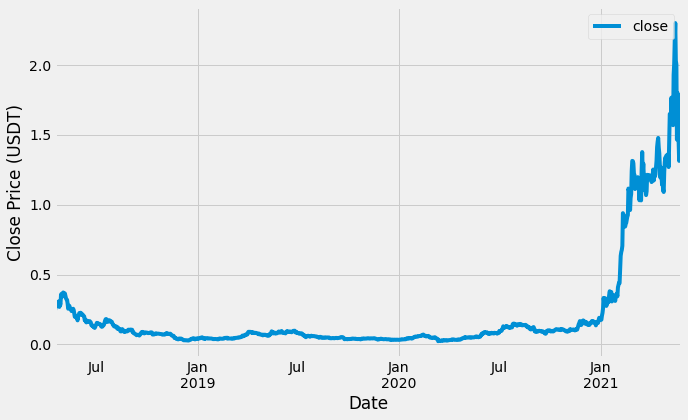

In [13]:
ax = dataset2.plot(x='date', y='close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USDT)")

# We have a total of 1137 data points representing Bitcoin-USD price for 1137 days (~3.2 years). We’re interested in predicting the closing price for future dates.

In [14]:
scaler = MinMaxScaler()

close_price = dataset2.close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [15]:
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
# Removing nan

In [16]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test =\
 preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [17]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(985, 99, 1) (985, 1) (52, 99, 1) (52, 1)


In [18]:
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(
  CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
  input_shape=(WINDOW_SIZE, X_train.shape[-1])
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  CuDNNLSTM(WINDOW_SIZE, return_sequences=False)
))

model.add(Dense(units=1))

model.add(Activation('linear'))

In [21]:
BATCH_SIZE = 64

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50


InvalidArgumentError: No OpKernel was registered to support Op 'CudnnRNNV2' used by {{node sequential_1/bidirectional/forward_cu_dnnlstm_1/CudnnRNNV2}} with these attrs: [seed=0, dropout=0, T=DT_FLOAT, input_mode="linear_input", direction="unidirectional", rnn_mode="lstm", seed2=0, is_training=true]
Registered devices: [CPU]
Registered kernels:
  device='GPU'; T in [DT_HALF]
  device='GPU'; T in [DT_FLOAT]
  device='GPU'; T in [DT_DOUBLE]

	 [[sequential_1/bidirectional/forward_cu_dnnlstm_1/CudnnRNNV2]] [Op:__inference_train_function_10785]

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

# For dataset 1 we see missing value count = 365 - 251 = 114 out of which 104 are Weekend days because in a year we have 52.1429 weeks multiplied by 2 gives us 104 days and ten extra days so we will use preprocessing on the data to fill the values for now we have added the missing values as 0 which means null values

In [ ]:
date=dataset2['Date']
data_copy2 = dataset2
data_copy2['Day Name'] = data_copy2['Date']
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
for i in range(len(date)):
    day = datetime.datetime.strptime(date[i], '%m/%d/%Y').weekday()
    data_copy2['Day Name'][i]= day_name[day]
data_copy2['Day Name']

In [ ]:
data_copy2.drop('Day Name', inplace=True, axis=1)
idx = pd.date_range('1/1/2019','12/31/2019')

data_copy2.index = pd.DatetimeIndex(data_copy2['Date'])

data_copy2 = data_copy2.reindex(idx, fill_value=np.nan,index=False)
data_copy2['Date']=data_copy2.index

# For 2019 dataset we see missing value count = 365 - 221 = 144 out of which 104 are Weekend days because in a year we have 52.1429 weeks multiplied by 2 gives us 104 days and 40 extra days so we will use preprocessing on the data to fill the values for now we have added the missing values as 0 which means null values

In [ ]:
date=dataset3['Date']
data_copy3 = dataset3
data_copy3['Day Name'] = data_copy3['Date']
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
for i in range(len(date)):
    day = datetime.datetime.strptime(date[i], '%m/%d/%Y').weekday()
    data_copy3['Day Name'][i]= day_name[day]
data_copy3['Day Name']

In [ ]:
data_copy3.drop('Day Name', inplace=True, axis=1)
idx = pd.date_range('1/1/2020','12/31/2020')

data_copy3.index = pd.DatetimeIndex(data_copy3['Date'])

data_copy3 = data_copy3.reindex(idx, fill_value=np.nan,index=False)
data_copy3['Date']=data_copy3.index

# For 2020 dataset we see missing value count = 365 - 175 = 190 out of which 104 are Weekend days because in a year we have 52.1429 weeks multiplied by 2 gives us 104 days and 86 extra days so we will use preprocessing on the data to fill the values for now we have added the missing values as 0 which means null values.

### In Time Series Datasets traditionally, researchers omit days where data includes crisis e.g. wars, conflicts and other impacts on the stocks and for that they drop the days including the values because it may affect the statistical signifcance of the datasets. According to me this the reason of the missing data and on Weekends this could be a normal practice as mostly on weekends there is no work going on so those dataset points are outside of Trading Hours.

# Pre Processing Techniques
- Fill values with closest in time values for that if the last working day is Friday we will take the value of Friday and add it to the weekends
- Normalise to the z-score so each row has mean=0 and sd=1, it allows us to understand the probability of a score occuring with normal distribution of the data
- It helps compare values from two different normal distributions.
- Missing Values according to Average of High and Low columns of the dataset

# Filling Values with Closest In Time using Nearest Interpolation Method of Python

In [ ]:
a=data_copy1
b=data_copy2
c=data_copy3
a.interpolate(method='nearest', inplace=True,fill_value='extrapolate',  limit_direction='both')
a

# Creating the variable Average, between the low and the high price to plot the Average Stock Price of Apple

In [ ]:
df1 = a
df1['Average'] = (a['High'] + a['Low'])/2
df1 = df1[['Average']]

In [ ]:
df1.plot(legend=True)
plt.title('Apple stock price')
plt.show() # Plotting Average Stock Price after Interpolation

In [ ]:
b.interpolate(method='nearest',fill_value='extrapolate' ,inplace=True,limit_direction='both')
b

In [ ]:
df2 = b
df2['Average'] = (b['High'] + b['Low'])/2
df2 = df2[['Average']]

In [ ]:
df2.plot(legend=True)
plt.title('Apple stock price')
plt.show() # Plotting Average Stock Price after Interpolation

In [ ]:
c.interpolate(method='nearest',inplace=True,fill_value='extrapolate'   ,limit_direction='both')
c

In [ ]:
df3 = c
df3['Average'] = (c['High'] + c['Low'])/2
df3 = df3[['Average']]

In [ ]:
df3.plot(legend=True)
plt.title('Apple stock price')
plt.show() # Plotting Average Stock Price after Interpolation

# Filling Values with Z-Score Normalization using built in library zcore of Python and Plotting Average

In [ ]:
d=data_copy1
e=data_copy2
f=data_copy3
df4=d
zetascore_table=zscore(df4.iloc[:,1:6],axis=1)

In [ ]:
df4['Average'] = (df4['High'] + df4['Low'])/2
df4 = df4[['Average']]
df4.plot(legend=True)
plt.title('Apple stock price')
plt.show() # Plotting Average Stock Price after Interpolation

In [ ]:
df5=e
zetascore_table=zscore(df5.iloc[:,1:6],axis=1)
df5['Average'] = (df5['High'] + df5['Low'])/2
df5 = df5[['Average']]
df5.plot(legend=True)
plt.title('Apple stock price')
plt.show() # Plotting Average Stock Price after Interpolation

In [ ]:
df6=f
zetascore_table=zscore(df6.iloc[:,1:6],axis=1)
df6['Average'] = (df6['High'] + df6['Low'])/2
df6 = df6[['Average']]
df6.plot(legend=True)
plt.title('Apple stock price')
plt.show() # Plotting Average Stock Price after Interpolation

# Filling Values with Mean Values and Imputing Null Values

In [ ]:
g=data_copy1
h=data_copy2
i=data_copy3
df7=g
df7.fillna(df7.iloc[:,1:6].mean())
df7['Average'] = (df7['High'] + df7['Low'])/2
df7 = df7[['Average']]
df7.plot(legend=True)
plt.title('Apple stock price')
plt.show() # Plotting Average Stock Price after Interpolation

In [ ]:
df8=h
df8.fillna(df8.iloc[:,1:6].mean())
df8['Average'] = (df8['High'] + df8['Low'])/2
df8 = df8[['Average']]
df8.plot(legend=True)
plt.title('Apple stock price')
plt.show() # Plotting Average Stock Price after Interpolation

In [ ]:
df9=i
df9.fillna(df9.iloc[:,1:6].mean())
df9['Average'] = (df9['High'] + df9['Low'])/2
df9 = df9[['Average']]
df9.plot(legend=True)
plt.title('Apple stock price')
plt.show() # Plotting Average Stock Price after Interpolation

# 2. Segmentation

## Bottom-up piecewise linear segmentation for the transformed and normalised log-return time series. For this we used three python files. Segment that has the implementation of bottom-up piecewise, fit that regression mse sum square error and interpolate methods and wrappers include the least square line fit function returns the parameters and error for a least squares line fit of one segment of a sequence

In [ ]:
from matplotlib.pylab import gca, figure, plot, subplot, title, xlabel, ylabel, xlim,show
from matplotlib.lines import Line2D
import segment
import fit

def draw_plot(data,plot_title):
    plot(range(len(data)),data,alpha=0.8,color='red')
    title(plot_title)
    xlabel("Samples")
    ylabel("Signal")
    xlim((0,len(data)-1))

def draw_segments(segments):
    ax = gca()
    for segment in segments:
        line = Line2D((segment[0],segment[2]),(segment[1],segment[3]))
        ax.add_line(line)

## Mean square errors tolerance levels: 1%

In [ ]:
data = data_copy1['Average']

max_error = 0.01

#sliding window with regression
figure()
segments = segment.bottomupsegment(data, fit.regression, fit.sumsquared_error, max_error)
draw_plot(data,"Sliding window with regression")
draw_segments(segments)
show()

In [ ]:
data = data_copy2['Average']

max_error = 0.01

#sliding window with regression
figure()
segments = segment.bottomupsegment(data, fit.regression, fit.sumsquared_error, max_error )
draw_plot(data,"Sliding window with regression")
draw_segments(segments)
show()

In [ ]:
data = data_copy3['Average']

max_error = 0.01

#sliding window with regression
figure()
segments = segment.bottomupsegment(data, fit.regression, fit.sumsquared_error, max_error )
draw_plot(data,"Sliding window with regression")
draw_segments(segments)
show()

## Mean square errors tolerance levels: 5%

In [ ]:
data = data_copy1['Average']

max_error = 0.05

#sliding window with regression
figure()
segments = segment.bottomupsegment(data, fit.regression, fit.sumsquared_error, max_error)
draw_plot(data,"Sliding window with regression")
draw_segments(segments)
show()

In [ ]:
data = data_copy2['Average']

max_error = 0.05

#sliding window with regression
figure()
segments = segment.bottomupsegment(data, fit.regression, fit.sumsquared_error, max_error )
draw_plot(data,"Sliding window with regression")
draw_segments(segments)
show()

In [ ]:
data = data_copy3['Average']

max_error = 0.05

#sliding window with regression
figure()
segments = segment.bottomupsegment(data, fit.regression, fit.sumsquared_error, max_error )
draw_plot(data,"Sliding window with regression")
draw_segments(segments)
show()

## Mean square errors tolerance levels: 10%

In [ ]:
data = data_copy1['Average']

max_error = 0.1

#sliding window with regression
figure()
segments = segment.bottomupsegment(data, fit.regression, fit.sumsquared_error, max_error )
draw_plot(data,"Sliding window with regression")
draw_segments(segments)
show()

In [ ]:
data = data_copy2['Average']

max_error = 0.1

#sliding window with regression
figure()
segments = segment.bottomupsegment(data, fit.regression, fit.sumsquared_error, max_error )
draw_plot(data,"Sliding window with regression")
draw_segments(segments)
show()

In [ ]:
data = data_copy3['Average']

max_error = 0.1

#sliding window with regression
figure()
segments = segment.bottomupsegment(data, fit.regression, fit.sumsquared_error, max_error )
draw_plot(data,"Sliding window with regression")
draw_segments(segments)
show()

#### The segments are similar for the mean squared error tolerance level for each dataset but are different from each other

# 3. Prediction

# For Prediction

# We transformed and normalised time series as a target 𝑔(𝑡) and other 2 as supporting data where we used 2018 2019 data as trainset and 2020 as test set and evaluated the error of the “next-day forecast” 

In [ ]:
trainset= pd.concat([a, b], axis=0)

In [ ]:
trainset

In [ ]:
testset=c

In [ ]:
testset

# We had to build ARIMA model for predicting forecast series
# 1st step to make data stationary Steps to make our data stationary.
# We use Dickey Fuller test to check the stationarity of the series.

### First step Dickey-Fuller test.

In [ ]:
def test_stationarity(timeseries):
 #Determing rolling statistics
 rolmean = timeseries.rolling(12).mean()
 rolstd = timeseries.rolling(12).std()
 #Plot rolling statistics:
 plt.plot(timeseries, color='blue',label='Original')
 plt.plot(rolmean, color='red', label='Rolling Mean')
 plt.plot(rolstd, color='black', label = 'Rolling Std')
 plt.legend(loc='best')
 plt.title('Rolling Mean and Standard Deviation')
 plt.show(block=False)
 
 print("Results of dickey fuller test")
 adft = adfuller(timeseries,autolag='AIC')
 # output for dft will give us without defining what the values are.
 #hence we manually write what values does it explains using a for loop
 output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
 for key,values in adft[4].items():
    output['critical value (%s)'%key] = values
 print(output)

 
test_stationarity(trainset['Close'])

### The statistics shows that the time series is non-stationary as Test Statistic > Critical value, the p-value is greater than 5%, and we can see an increasing trend in the data. So, firstly we will try to make the data stationary. For doing so, we need to remove the trend and seasonality from the data.


#### Removing trend and seasonality to make data Stationary

In [ ]:
train_log = np.log(trainset['Close']) 
test_log = np.log(testset['Close'])
moving_avg = train_log.rolling(24).mean() 
plt.plot(train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [ ]:
train_log_moving_avg_diff = train_log - moving_avg

### Since we took the average of values, rolling mean is not defined for the first few values. So let’s drop those null values.

In [ ]:
train_log_moving_avg_diff.dropna(inplace = True),
test_stationarity(train_log_moving_avg_diff)

##### We can see that the Test Statistic is less than the Critical Value and the p-value is less than 5%.  So, we can be confident that the trend is almost removed. Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series. Differencing can help to make the series stable and eliminate the trend.


In [ ]:
train_log_diff = train_log - train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

Now we will decompose the time series into trend and seasonality and will
get the residual which is the random variation in the series.
Removing Seasonality
By seasonality, we mean periodic fluctuations. A seasonal pattern exists 
when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.
We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.
We use the code below to check the stationarity of residuals.

In [ ]:
decomposition = seasonal_decompose(pd.DataFrame(train_log).Close.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['Date'] = train_log.index 
train_log_decompose.set_index('Date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['Date'] = train_log.index 
train_log_decompose.set_index('Date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

Fit Auto ARIMA: Fit the model on the univariate series.
Predict values on validation set: Make predictions on the test set.
Calculate RMSE: Check the performance of the model using the predicted values against the actual values.

In [ ]:
model = auto_arima(train_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_log)
forecast = model.predict(n_periods=len(testset))
forecast = pd.DataFrame(forecast,index = test_log.index,columns=['Prediction'])
#plot the predictions for validation set
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test_log,forecast))
print("RMSE: ", rms)

# A RMSE of 0 indicates a perfect fit with no errors. The smaller the RMSE score the better the model. A RMSE score of 0.3119861247938011 indicates a good model and we have plotted it as well.

### Now completing the remaining parts similarly so the subpart number 1 is we used 2018 dataset as train set and 2019 as test set

In [ ]:
trainset= a

In [ ]:
trainset

In [ ]:
testset=b

In [ ]:
testset

In [ ]:
def test_stationarity(timeseries):
 #Determing rolling statistics
 rolmean = timeseries.rolling(12).mean()
 rolstd = timeseries.rolling(12).std()
 #Plot rolling statistics:
 plt.plot(timeseries, color='blue',label='Original')
 plt.plot(rolmean, color='red', label='Rolling Mean')
 plt.plot(rolstd, color='black', label = 'Rolling Std')
 plt.legend(loc='best')
 plt.title('Rolling Mean and Standard Deviation')
 plt.show(block=False)
 
 print("Results of dickey fuller test")
 adft = adfuller(timeseries,autolag='AIC')
 # output for dft will give us without defining what the values are.
 #hence we manually write what values does it explains using a for loop
 output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
 for key,values in adft[4].items():
    output['critical value (%s)'%key] = values
 print(output)

 
test_stationarity(trainset['Close'])

In [ ]:
train_log = np.log(trainset['Close']) 
test_log = np.log(testset['Close'])
moving_avg = train_log.rolling(24).mean() 
plt.plot(train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [ ]:
train_log_moving_avg_diff = train_log - moving_avg

In [ ]:
train_log_moving_avg_diff.dropna(inplace = True),
test_stationarity(train_log_moving_avg_diff)

In [ ]:
train_log_diff = train_log - train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

In [ ]:
decomposition = seasonal_decompose(pd.DataFrame(train_log).Close.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['Date'] = train_log.index 
train_log_decompose.set_index('Date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['Date'] = train_log.index 
train_log_decompose.set_index('Date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [ ]:
model = auto_arima(train_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_log)
forecast = model.predict(n_periods=len(testset))
forecast = pd.DataFrame(forecast,index = test_log.index,columns=['Prediction'])
#plot the predictions for validation set
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test_log,forecast))
print("RMSE: ", rms)

## A RMSE score of 0.60 indicates not a good model. We can use other methods for time series forecasting and compare your results using accuracy metrics to pick the best model.

### Subtask two 2018 as train set and 2020 as test set this is the 2nd part of prediction 

In [ ]:
trainset

In [ ]:
testset=c

In [ ]:
testset

In [ ]:
def test_stationarity(timeseries):
 #Determing rolling statistics
 rolmean = timeseries.rolling(12).mean()
 rolstd = timeseries.rolling(12).std()
 #Plot rolling statistics:
 plt.plot(timeseries, color='blue',label='Original')
 plt.plot(rolmean, color='red', label='Rolling Mean')
 plt.plot(rolstd, color='black', label = 'Rolling Std')
 plt.legend(loc='best')
 plt.title('Rolling Mean and Standard Deviation')
 plt.show(block=False)
 
 print("Results of dickey fuller test")
 adft = adfuller(timeseries,autolag='AIC')
 # output for dft will give us without defining what the values are.
 #hence we manually write what values does it explains using a for loop
 output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
 for key,values in adft[4].items():
    output['critical value (%s)'%key] = values
 print(output)

 
test_stationarity(trainset['Close'])

In [ ]:
train_log = np.log(trainset['Close']) 
test_log = np.log(testset['Close'])
moving_avg = train_log.rolling(24).mean() 
plt.plot(train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [ ]:
train_log_moving_avg_diff.dropna(inplace = True),
test_stationarity(train_log_moving_avg_diff)

In [ ]:
train_log_diff = train_log - train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

In [ ]:
decomposition = seasonal_decompose(pd.DataFrame(train_log).Close.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['Date'] = train_log.index 
train_log_decompose.set_index('Date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['Date'] = train_log.index 
train_log_decompose.set_index('Date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [ ]:
model = auto_arima(train_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_log)
forecast = model.predict(n_periods=len(testset))
forecast = pd.DataFrame(forecast,index = test_log.index,columns=['Prediction'])
#plot the predictions for validation set
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test_log,forecast))
print("RMSE: ", rms)

0.58 is partially a normal model and we can use other methods for time series forecasting and compare our results using accuracy metrics to pick the best model.

# 4. Adaptive predictors.

### In the last part that is for the adaptive predictors we used the SARIMAX Model "Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, or SARIMAX, is an extension of the ARIMA class of models. Intuitively, ARIMA models compose 2 parts: the autoregressive term (AR) and the moving-average term (MA). The former views the value at one time just as a weighted sum of past values." We used ARIMA model and for the data we got we splitted our data on delta= 5, 10 and 30 and created and predicted the adaptive predictors and we used 2020's dataset for this exercise.

### We had to build ARIMA model for predicting forecast series
### 1st step to make data stationary Steps to make our data stationary.
### We use Dickey Fuller test to check the stationarity of the series.
### First step Dickey-Fuller test.

In [ ]:
def test_stationarity(timeseries):
 #Determing rolling statistics
 rolmean = timeseries.rolling(12).mean()
 rolstd = timeseries.rolling(12).std()
 #Plot rolling statistics:
 plt.plot(timeseries, color='blue',label='Original')
 plt.plot(rolmean, color='red', label='Rolling Mean')
 plt.plot(rolstd, color='black', label = 'Rolling Std')
 plt.legend(loc='best')
 plt.title('Rolling Mean and Standard Deviation')
 plt.show(block=False)
 
 print("Results of dickey fuller test")
 adft = adfuller(timeseries,autolag='AIC')
 # output for adft will give us without defining what the values are.
 #hence we manually write what values does it explains using a for loop
 output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
 for key,values in adft[4].items():
    output['critical value (%s)'%key] = values
 print(output)

 
test_stationarity(c['Close'])

### The statistics shows that the time series is non-stationary as Test Statistic > Critical value, the p-value is greater than 5%, and we can see an increasing trend in the data. So, firstly we will try to make the data stationary. For doing so, we need to remove the trend and seasonality from the data.¶
### Removing trend and seasonality to make data Stationary

In [ ]:
train_log = np.log(c['Close']) 
moving_avg = train_log.rolling(24).mean() 
plt.plot(train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [ ]:
train_log_moving_avg_diff = train_log - moving_avg
train_log_moving_avg_diff.dropna(inplace = True),
test_stationarity(train_log_moving_avg_diff)

### We can see that the Test Statistic is less than the Critical Value and the p-value is less than 5%. So, we can be confident that the trend is almost removed. Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series. Differencing can help to make the series stable and eliminate the trend.

In [ ]:
train_log_diff = train_log - train_log.shift(5) #setting frame width delta=5 days
test_stationarity(train_log_diff.dropna())

In [ ]:
decomposition = seasonal_decompose(pd.DataFrame(train_log).Close.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['Date'] = train_log.index 
train_log_decompose.set_index('Date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['Date'] = train_log.index 
train_log_decompose.set_index('Date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [ ]:
model = auto_arima(train_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_log)
forecast = model.predict(len(test_log))
forecast = pd.DataFrame(forecast,index = test_log.index,columns=['Prediction'])
#plot the predictions for validation set
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test_log,forecast))
print("RMSE: ", rms)

In [ ]:
train_log_diff = train_log - train_log.shift(10) #setting frame width delta=10 days
test_stationarity(train_log_diff.dropna())

### Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series. Removing Seasonality By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). We will use seasonal decompose to decompose the time series into trend, seasonality and residuals. We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter. We use the code below to check the stationarity of residuals.

In [ ]:
decomposition = seasonal_decompose(pd.DataFrame(train_log).Close.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['Date'] = train_log.index 
train_log_decompose.set_index('Date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['Date'] = train_log.index 
train_log_decompose.set_index('Date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [ ]:
model = auto_arima(train_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_log)
forecast = model.predict(len(test_log))
forecast = pd.DataFrame(forecast,index = test_log.index,columns=['Prediction'])
#plot the predictions for validation set
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

rms = sqrt(mean_squared_error(test_log,forecast))
print("RMSE: ", rms)

In [ ]:
train_log_diff = train_log - train_log.shift(30)  #setting frameset delta=30 days
test_stationarity(train_log_diff.dropna())

decomposition = seasonal_decompose(pd.DataFrame(train_log).Close.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['Date'] = train_log.index 
train_log_decompose.set_index('Date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['Date'] = train_log.index 
train_log_decompose.set_index('Date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])
#Fit Auto ARIMA: Fit the model on the univariate series. Predict values on validation set: Make predictions on the test set. 
#Calculate RMSE: Check the performance of the model using the predicted values against the actual values.
model = auto_arima(train_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_log)
forecast = model.predict(len(test_log))
forecast = pd.DataFrame(forecast,index = test_log.index,columns=['Prediction'])
#plot the predictions for validation set
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

rms = sqrt(mean_squared_error(test_log,forecast))
print("RMSE: ", rms)

### A RMSE of 0 indicates a perfect fit with no errors. The smaller the RMSE score the better the model. A RMSE score of 0.31176350442708917 indicates a good model and we have plotted it as well.

In [ ]:
model=sm.tsa.statespace.SARIMAX(c['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c['forecast']=results.predict(start=90,end=200,dynamic=True)
c[['Close','forecast']].plot(figsize=(12,8))

### For the mean square error we have good model with RMSE score just above 0.31 and when we are trying to predict/forecast value with SARIMAX it predicts our overall trend but was not able to adjust for the seasonality correctly for 2020's year dataset. We can measure this with other models like Prophet , LSTM and also this is corely dependent on the dataset as well 